In [1]:
import torch; torch.manual_seed(0)
import torch.distributions

from utils import get_cov_dataset, plot_2d

# Train VAE or DVAE

In [2]:
from pytorch_lightning import Trainer
from models.VAEExperiment import VAEXperiment
from models.DVAE import DVAE
from models.VAE import VAE
import yaml

def train(cfg, model_name, train_data, cov=None):
    with open(cfg, 'r') as file:
        try:
            config = yaml.safe_load(file)
        except yaml.YAMLError as exc:
            print(exc)

    if model_name == 'DVAE':
        model = DVAE(cov, **config['model_params'])
    elif model_name == 'VAE':
        model = VAE(**config['model_params'])
    else:
        raise ValueError('Only VAE or DVAE are allowed')

    experiment = VAEXperiment(model, config['exp_params'])

    runner = Trainer(**config['trainer_params'])
    runner.fit(experiment, train_dataloaders=train_data)

    return runner, experiment

In [6]:
data = get_cov_dataset(
    "cres",
    5000,
    5000,
    bs=5000,
    lam=0,
)

trainer_vae, experiment_vae = train('configs/vae.yaml', 'VAE', data[0])
trainer_dvae, experiment_dvae = train('configs/dvae.yaml', 'DVAE', data[0], data[3]['cov'])

ignoring parameters:  {}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | VAE  | 390   
-------------------------------
390       Trainable params
0         Non-trainable params
390       Total params
0.002     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

tensor(1.1301, device='cuda:0')
tensor(0.2489, device='cuda:0')
tensor(1.0053, device='cuda:0')
tensor(0.3191, device='cuda:0')
tensor(0.9189, device='cuda:0')
tensor(0.4046, device='cuda:0')
tensor(0.8522, device='cuda:0')
tensor(0.5023, device='cuda:0')
tensor(0.7908, device='cuda:0')
tensor(0.6097, device='cuda:0')
tensor(0.7366, device='cuda:0')
tensor(0.7251, device='cuda:0')
tensor(0.6781, device='cuda:0')
tensor(0.8457, device='cuda:0')
tensor(0.6355, device='cuda:0')
tensor(0.9700, device='cuda:0')
tensor(0.5935, device='cuda:0')
tensor(1.0963, device='cuda:0')
tensor(0.5748, device='cuda:0')
tensor(1.2222, device='cuda:0')
tensor(0.5444, device='cuda:0')
tensor(1.3453, device='cuda:0')
tensor(0.5221, device='cuda:0')
tensor(1.4637, device='cuda:0')
tensor(0.5040, device='cuda:0')
tensor(1.5767, device='cuda:0')
tensor(0.4818, device='cuda:0')
tensor(1.6839, device='cuda:0')
tensor(0.4685, device='cuda:0')
tensor(1.7854, device='cuda:0')
tensor(0.4399, device='cuda:0')
tensor(1

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | DVAE | 234   
-------------------------------
234       Trainable params
0         Non-trainable params
234       Total params
0.001     Total estimated model params size (MB)


tensor(0.1166, device='cuda:0')
tensor(3.5654, device='cuda:0')
tensor(0.1148, device='cuda:0')
tensor(3.5666, device='cuda:0')
tensor(0.1116, device='cuda:0')
tensor(3.5677, device='cuda:0')


Training: 0it [00:00, ?it/s]

tensor(2.1633, device='cuda:0')
tensor(28111.6992, device='cuda:0')
tensor(1.1995, device='cuda:0')
tensor(21898.3203, device='cuda:0')
tensor(1.2939, device='cuda:0')
tensor(21449.5117, device='cuda:0')
tensor(1.4083, device='cuda:0')
tensor(17658.5293, device='cuda:0')
tensor(2.3878, device='cuda:0')
tensor(15366.7461, device='cuda:0')
tensor(1.2077, device='cuda:0')
tensor(14308.8320, device='cuda:0')
tensor(1.3304, device='cuda:0')
tensor(12752.9951, device='cuda:0')
tensor(1.2259, device='cuda:0')
tensor(12621.7021, device='cuda:0')
tensor(1.7808, device='cuda:0')
tensor(11871.0410, device='cuda:0')
tensor(1.8122, device='cuda:0')
tensor(11585.2646, device='cuda:0')
tensor(2.4818, device='cuda:0')
tensor(11474.1934, device='cuda:0')
tensor(1.6571, device='cuda:0')
tensor(10903.8574, device='cuda:0')
tensor(1.3630, device='cuda:0')
tensor(10742.7402, device='cuda:0')
tensor(1.3102, device='cuda:0')
tensor(10520.0293, device='cuda:0')
tensor(1.3823, device='cuda:0')
tensor(10402.214

`Trainer.fit` stopped: `max_epochs=100` reached.


tensor(1.3869, device='cuda:0')
tensor(9099.0381, device='cuda:0')


# Visualize examples

In [7]:
samples_train = torch.cat([x for x in data[0]])
samples_val = torch.cat([x for x in data[1]])

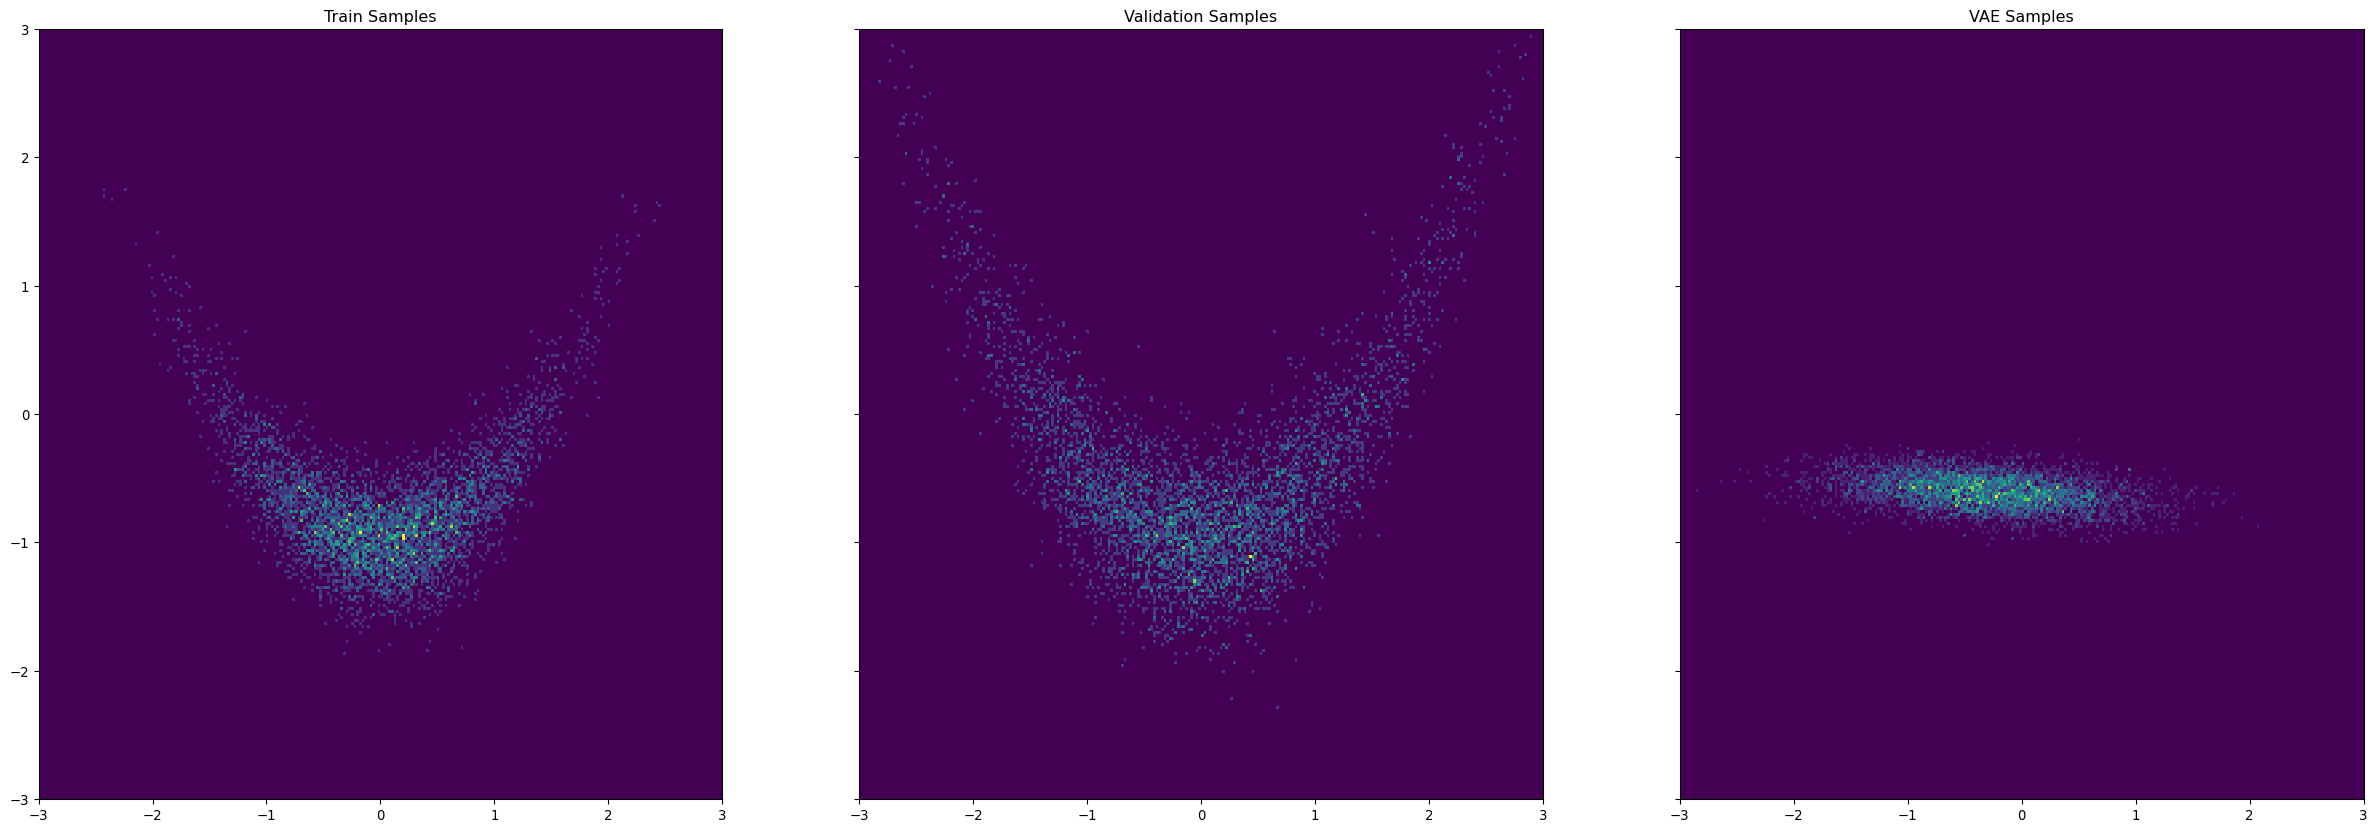

In [5]:
plot_2d(samples_train, samples_val, experiment_vae.sample(5000).detach(), ['Train Samples', 'Validation Samples', 'VAE Samples'], pixels=1000)

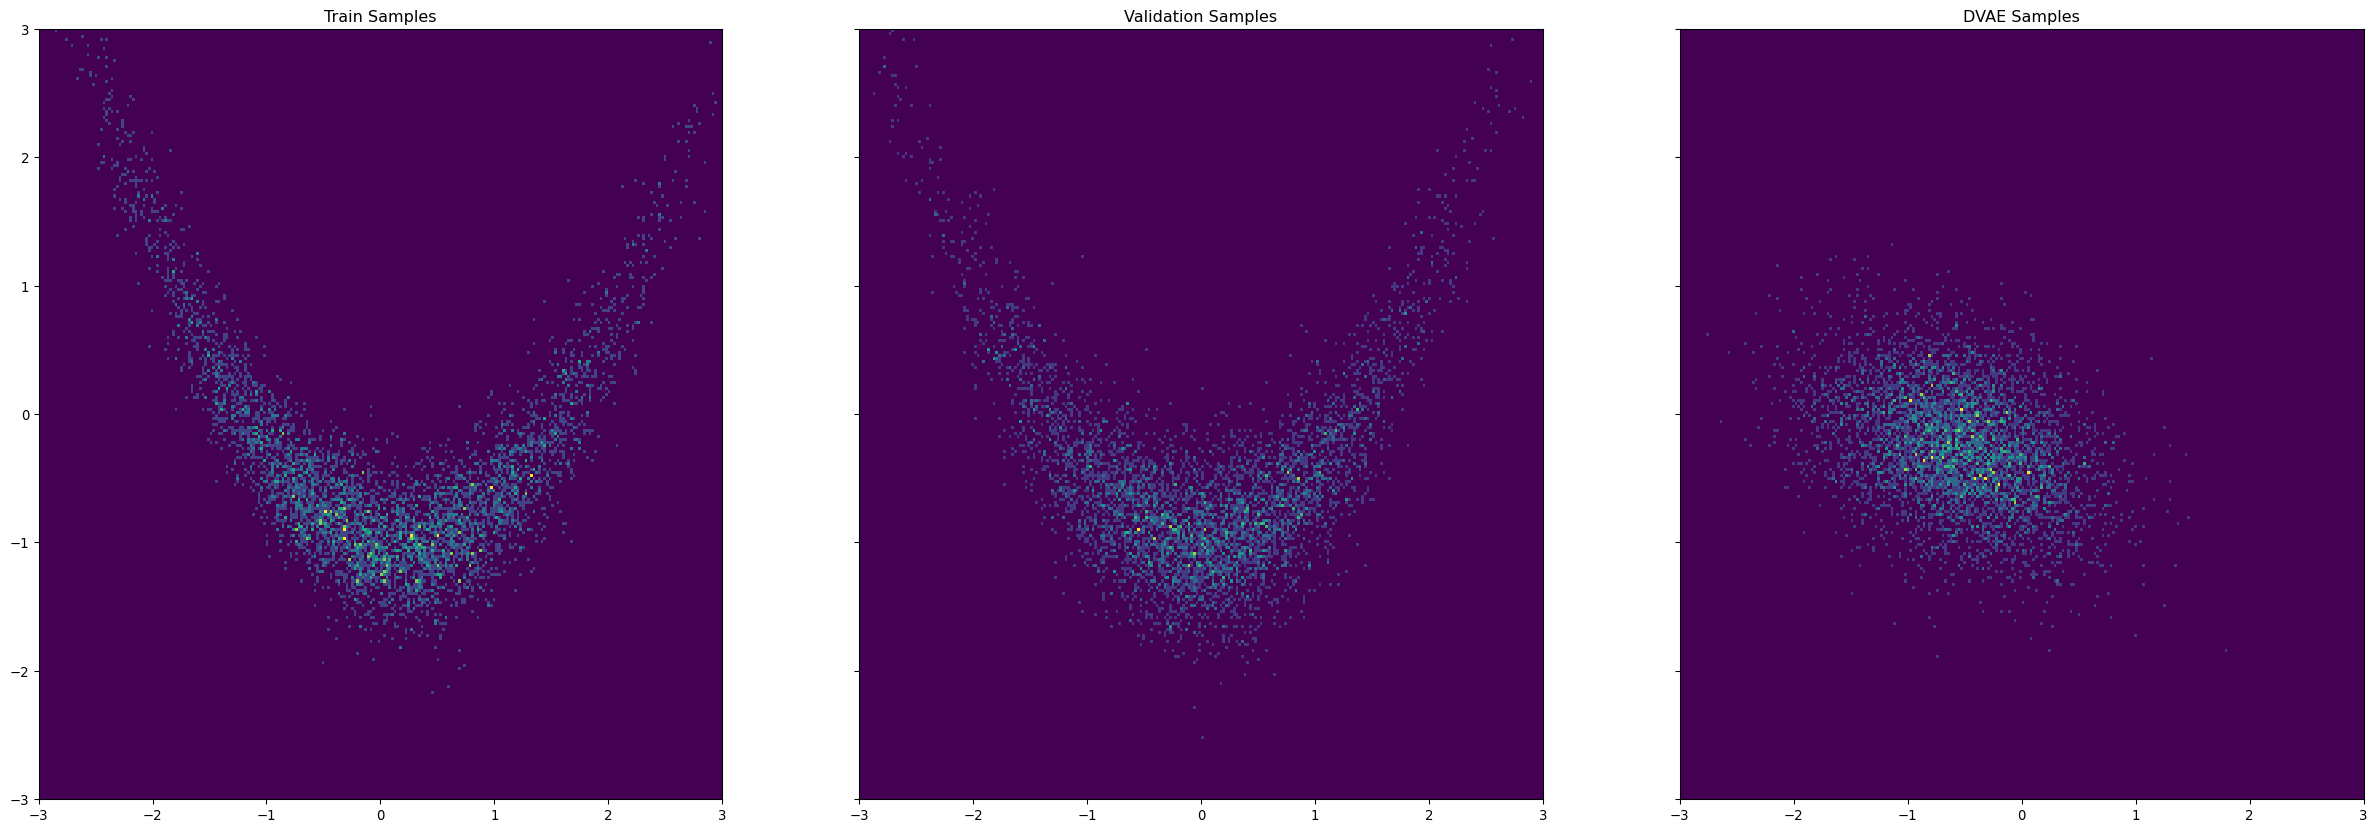

In [8]:
plot_2d(samples_train, samples_val, experiment_dvae.sample(5000).detach(), ['Train Samples', 'Validation Samples', 'DVAE Samples'], pixels=1000)